# LAB4 — Filtragens no Domínio Espacial (continuação)

Disciplina: **Processamento Digital de Imagens (PDI)** – UFPel  
Professor: **Guilherme Corrêa**  

Este notebook continua o lab anterior (Lab3), com foco nos conceitos de **filtragens no domínio espacial** em imagens digitais.

---

## Objetivos  
- Carregar e visualizar imagens em escala de cinza.  
- Exercitar a convolução de filtros sobre imagens.  
- Realizar filtragem para suavização de imagens.  
- Realizar filtragem para remoção de ruído sal & pimenta.  
- Realizar filtragem para realce de imagens.  
- Comparar os efeitos visuais das diferentes filtragens.  

---

## Bibliotecas úteis
Se estiver no Colab, rode a célula de instalação uma única vez.

In [11]:
# Se necessário no Colab, descomente a linha abaixo:
!pip -q install numpy matplotlib scikit-image imageio

In [12]:
# %% setup - Importações e funções utilitárias
import numpy as np
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

# 🖼️ Tarefa A — Reduzindo Ruído com Filtro de Média

Vamos utilizar **como ponto de partida** as funções de suavização implementadas no lab anterior (Lab3) para reduzir o ruído da imagem `lena_ruido.bmp`, que está disponível na pasta `data` do repositório no github.

**Lembre-se:** quanto maior o tamanho da máscara de filtragem, mais forte será o efeito de suavização.

A nova função deve:
- **Receber** o caminho de uma imagem BMP em escala de cinza com ruído.
- **Altere** os filtros gaussianos implementados no lab anterior para que se tornem filtros de média simples (isto é, todos os pontos dentro da máscara possuem o mesmo peso).
- **Suavizar** a imagem aplicando filtros de média.
- **Salvar** a imagem num arquivo BMP.
- **Retornar** o caminho da imagem salva.

In [13]:
def suaviza_media_3x3(figura):

    path = Path(figura)   # "figura" deve já estar em escala de cinza
    img = Image.open(path)
    arr = np.asarray(img, dtype=np.uint8)

    # padding 'reflect' para evitar bordas escuras
    p = np.pad(arr, ((1,1),(1,1)), mode='reflect').astype(np.float32)

    # Convolução vetorizada (soma ponderada das vizinhanças 3x3) -- vetorização processa todos os pixels de uma vez, sem laços!
    out = (
        1*p[0:-2, 0:-2] + 1*p[0:-2, 1:-1] + 1*p[0:-2, 2:] +
        2*p[1:-1, 0:-2] + 1*p[1:-1, 1:-1] + 1*p[1:-1, 2:] +
        1*p[2:  , 0:-2] + 1*p[2:  , 1:-1] + 1*p[2:  , 2:]
    ) / 9.0

    out = np.clip(out, 0, 255).astype(np.uint8)

    out_path = path.with_name(path.stem + "_suave_media_3x3.bmp")
    Image.fromarray(out, mode='L').save(out_path, format="BMP")

    return str(out_path)

In [14]:
def suaviza_media_5x5(figura):

    path = Path(figura)   # "figura" deve já estar em escala de cinza
    img = Image.open(path)
    arr = np.asarray(img, dtype=np.uint8)

    # padding 'reflect' para evitar bordas escuras. Para 5x5, padding é de 2.
    p = np.pad(arr, ((2,2),(2,2)), mode='reflect').astype(np.float32)

    # Convolução vetorizada (soma ponderada das vizinhanças 5x5) com todos os pesos = 1
    # e divisão por 25 para a média.
    out = (
        1*p[0:-4, 0:-4] + 1*p[0:-4, 1:-3] + 1*p[0:-4, 2:-2] + 1*p[0:-4, 3:-1] + 1*p[0:-4, 4:] +
        1*p[1:-3, 0:-4] + 1*p[1:-3, 1:-3] + 1*p[1:-3, 2:-2] + 1*p[1:-3, 3:-1] + 1*p[1:-3, 4:] +
        1*p[2:-2, 0:-4] + 1*p[2:-2, 1:-3] + 1*p[2:-2, 2:-2] + 1*p[2:-2, 3:-1] + 1*p[2:-2, 4:] +
        1*p[3:-1, 0:-4] + 1*p[3:-1, 1:-3] + 1*p[3:-1, 2:-2] + 1*p[3:-1, 3:-1] + 1*p[3:-1, 4:] +
        1*p[4:  , 0:-4] + 1*p[4:  , 1:-3] + 1*p[4:  , 2:-2] + 1*p[4:  , 3:-1] + 1*p[4:  , 4:]
    ) / 25.0

    out = np.clip(out, 0, 255).astype(np.uint8)

    out_path = path.with_name(path.stem + "_suave_media_5x5.bmp")
    Image.fromarray(out, mode='L').save(out_path, format="BMP")

    return str(out_path)

In [15]:
def suaviza_media_7x7(figura):

    path = Path(figura)   # "figura" deve já estar em escala de cinza
    img = Image.open(path)
    arr = np.asarray(img, dtype=np.uint8)

    # padding 'reflect' para evitar bordas escuras. Para 7x7, padding é de 3.
    p = np.pad(arr, ((3,3),(3,3)), mode='reflect').astype(np.float32)

    # Convolução vetorizada (soma ponderada das vizinhanças 7x7) com todos os pesos = 1
    # e divisão por 49 para a média.
    out = (
        1*p[0:-6, 0:-6] + 1*p[0:-6, 1:-5] + 1*p[0:-6, 2:-4] + 1*p[0:-6, 3:-3] + 1*p[0:-6, 4:-2] + 1*p[0:-6, 5:-1] + 1*p[0:-6, 6:] +
        1*p[1:-5, 0:-6] + 1*p[1:-5, 1:-5] + 1*p[1:-5, 2:-4] + 1*p[1:-5, 3:-3] + 1*p[1:-5, 4:-2] + 1*p[1:-5, 5:-1] + 1*p[1:-5, 6:] +
        1*p[2:-4, 0:-6] + 1*p[2:-4, 1:-5] + 1*p[2:-4, 2:-4] + 1*p[2:-4, 3:-3] + 1*p[2:-4, 4:-2] + 1*p[2:-4, 5:-1] + 1*p[2:-4, 6:] +
        1*p[3:-3, 0:-6] + 1*p[3:-3, 1:-5] + 1*p[3:-3, 2:-4] + 1*p[3:-3, 3:-3] + 1*p[3:-3, 4:-2] + 1*p[3:-3, 5:-1] + 1*p[3:-3, 6:] +
        1*p[4:-2, 0:-6] + 1*p[4:-2, 1:-5] + 1*p[4:-2, 2:-4] + 1*p[4:-2, 3:-3] + 1*p[4:-2, 4:-2] + 1*p[4:-2, 5:-1] + 1*p[4:-2, 6:] +
        1*p[5:-1, 0:-6] + 1*p[5:-1, 1:-5] + 1*p[5:-1, 2:-4] + 1*p[5:-1, 3:-3] + 1*p[5:-1, 4:-2] + 1*p[5:-1, 5:-1] + 1*p[5:-1, 6:] +
        1*p[6:  , 0:-6] + 1*p[6:  , 1:-5] + 1*p[6:  , 2:-4] + 1*p[6:  , 3:-3] + 1*p[6:  , 4:-2] + 1*p[6:  , 5:-1] + 1*p[6:  , 6:]
    ) / 49.0

    out = np.clip(out, 0, 255).astype(np.uint8)

    out_path = path.with_name(path.stem + "_suave_media_7x7.bmp")
    Image.fromarray(out, mode='L').save(out_path, format="BMP")

    return str(out_path)

/tmp/ipython-input-619054216.py:20: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray(out, mode='L').save(out_path, format="BMP")
/tmp/ipython-input-1572065702.py:23: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray(out, mode='L').save(out_path, format="BMP")
/tmp/ipython-input-1503940824.py:25: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray(out, mode='L').save(out_path, format="BMP")


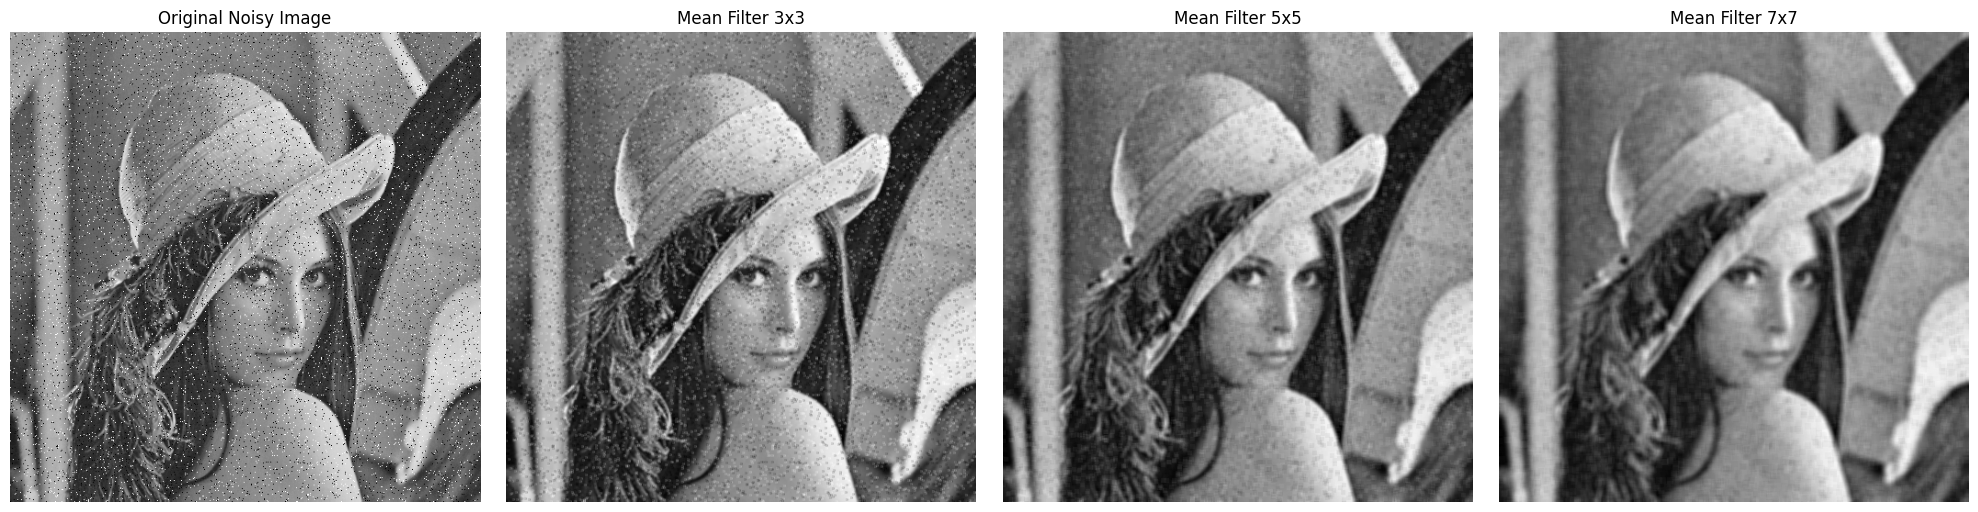

In [16]:
image_path = '/content/lena_ruido.bmp'

# Load original image
original_img = Image.open(image_path)
original_arr = np.asarray(original_img, dtype=np.uint8)

# Apply mean filters
filtered_3x3_path = suaviza_media_3x3(image_path)
filtered_5x5_path = suaviza_media_5x5(image_path)
filtered_7x7_path = suaviza_media_7x7(image_path)

# Load filtered images
filtered_3x3_arr = np.asarray(Image.open(filtered_3x3_path), dtype=np.uint8)
filtered_5x5_arr = np.asarray(Image.open(filtered_5x5_path), dtype=np.uint8)
filtered_7x7_arr = np.asarray(Image.open(filtered_7x7_path), dtype=np.uint8)

# Display images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(original_arr, cmap='gray')
axes[0].set_title('Original Noisy Image')
axes[0].axis('off')

axes[1].imshow(filtered_3x3_arr, cmap='gray')
axes[1].set_title('Mean Filter 3x3')
axes[1].axis('off')

axes[2].imshow(filtered_5x5_arr, cmap='gray')
axes[2].set_title('Mean Filter 5x5')
axes[2].axis('off')

axes[3].imshow(filtered_7x7_arr, cmap='gray')
axes[3].set_title('Mean Filter 7x7')
axes[3].axis('off')

plt.tight_layout()
plt.show()


---
# 🖼️ Tarefa B — Reduzindo Ruído com Filtro de Mediana

Você deve ter notado que após aplicar o filtro de média para reduzir o ruído, a imagem ficou **excessivamente suavizada**, perdendo nitidez. Além disso, o ruído ainda existe, apenas está borrado.

Para ruídos deste tipo da imagem de exemplo (chamado ruído "sal & pimenta"), a melhor solução é aplicar o **filtro de mediana**.

Nesta tarefa, aplique o filtro de mediana sobre a imagem ruidosa e verifique o **resultado**

In [ ]:
## ---------------- NAO RODAR, ALGO MODIFIQUEI E FIZ ERRADO ----------------------
## NAO TA FUNCIONANDO MAIS USA OA DO PROFESSOR QUE TA !!!!!!!!!!!!!!!!!!!!!1
##def suaviza_mediana_3x3(figura):

    path = Path(figura)   # "figura" deve já estar em escala de cinza
    img = Image.open(path)
    arr = np.asarray(img, dtype=np.uint8)

    # padding 'reflect' para evitar bordas escuras. Para 3x3, padding é de 1.
    p = np.pad(arr, ((1,1),(1,1)), mode='reflect').astype(np.float32)

    # Initialize an empty array for the output
    out = np.zeros_like(arr, dtype=np.float32)

    # Iterate through each pixel of the original image
    for row in range(arr.shape[0]):
        for col in range(arr.shape[1]):
            # Extract the 3x3 neighborhood from the padded image
            neighborhood = p[row:row+3, col:col+3]
            # Calculate the median of the neighborhood
            out[row, col] = np.median(neighborhood)

    out = np.clip(out, 0, 255).astype(np.uint8)

    out_path = path.with_name(path.stem + "_suave_mediana_3x3.bmp")
    Image.fromarray(out, mode='L').save(out_path, format="BMP")

    return str(out_path)

In [2]:
def suaviza_mediana_3x3(figura):

    path = Path(figura)
    img = Image.open(path).convert("L")
    arr = np.asarray(img, dtype=np.uint8).astype(np.float32)

    # padding refletido (raio = 1)
    p = np.pad(arr, ((1,1),(1,1)), mode='reflect')

    # Cria array de saída
    out = np.zeros_like(arr)

    # Aplica mediana na vizinhança 3x3
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            janela = p[i:i+3, j:j+3]
            out[i, j] = np.median(janela)

    out = np.clip(out, 0, 255).astype(np.uint8)

    out_path = path.with_name(path.stem + "_suave_mediana_3x3.bmp")
    Image.fromarray(out, mode="L").save(out_path, format="BMP")

    return str(out_path)

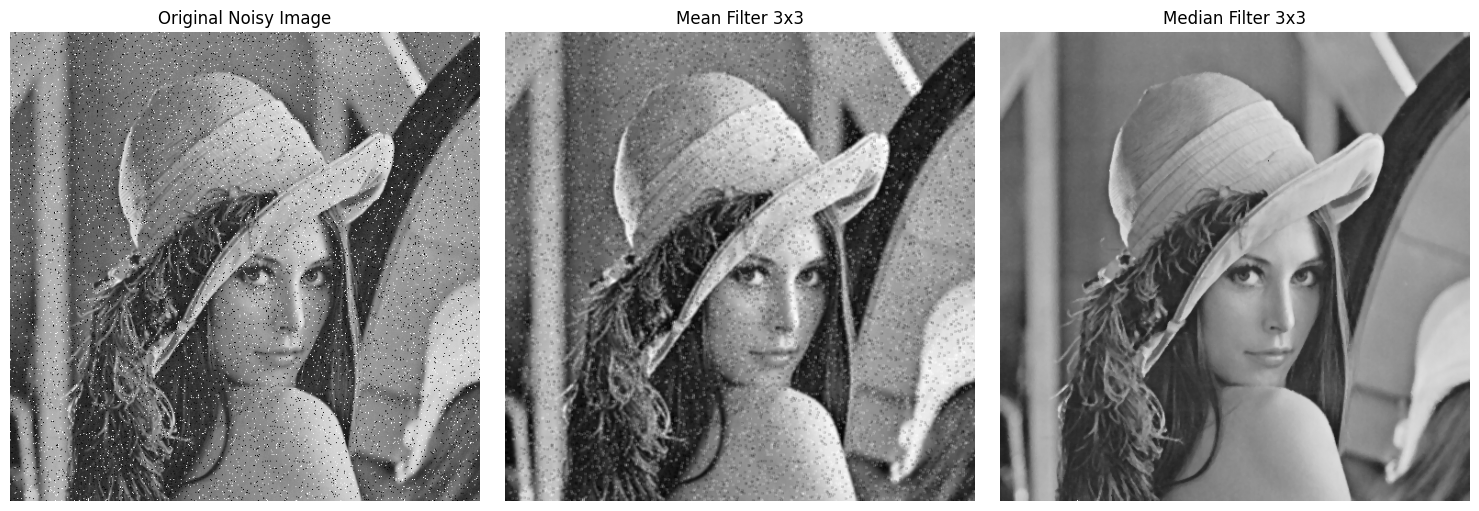

In [18]:
filtered_median_3x3_path = suaviza_mediana_3x3(image_path)

# Load the median-filtered image
filtered_median_3x3_arr = np.asarray(Image.open(filtered_median_3x3_path), dtype=np.uint8)

# Display images for comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_arr, cmap='gray')
axes[0].set_title('Original Noisy Image')
axes[0].axis('off')

axes[1].imshow(filtered_3x3_arr, cmap='gray')
axes[1].set_title('Mean Filter 3x3')
axes[1].axis('off')

axes[2].imshow(filtered_median_3x3_arr, cmap='gray')
axes[2].set_title('Median Filter 3x3')
axes[2].axis('off')

plt.tight_layout()
plt.show()

---
# 🖼️ Tarefa C — Realçando uma Imagem Muito Suavizada

Nesta tarefa, você deve criar um **filtro de realce** (ou aguçamento), que faz o efeito inverso da suavização: **destaca contornos e detalhes**.

Vamos criar um filtro de realce usando o **laplaciano**. O objetivo é recuperar a nitidez e evidenciar as transições de intensidade na imagem.

Use a mascara laplaciana clássica estudada na aula teórica:



```
    # Máscara Laplaciana 3x3 clássica (realce de bordas)
    lap = (
        1*p[0:-2, 0:-2] + 1*p[0:-2, 1:-1] + 1*p[0:-2, 2:] +
        1*p[1:-1, 0:-2] +  -8*p[1:-1, 1:-1] + 1*p[1:-1, 2:] +
        1*p[2:, 0:-2] + 1*p[2:, 1:-1] + 1*p[2:, 2:]
    )
```



In [34]:
def rrrrrrrrrrrealca_laplaciano_3x3(figura):
    path = Path(figura)
    img = Image.open(path).convert("L") # Ensure grayscale
    arr = np.asarray(img, dtype=np.uint8).astype(np.float32)

    # padding 'reflect' for 3x3 filter, padding size is 1
    p = np.pad(arr, ((1,1),(1,1)), mode='reflect').astype(np.float32)

    # Máscara Laplaciana 3x3 clássica (realce de bordas)
    # The sharpening is typically original - laplacian.
    # The problem provided -8 for the center, which makes 'arr - lap' a standard sharpening operation.
    lap = (
        1*p[0:-2, 0:-2] + 1*p[0:-2, 1:-1] + 1*p[0:-2, 2:] +
        1*p[1:-1, 0:-2] +  -8*p[1:-1, 1:-1] + 1*p[1:-1, 2:] +
        1*p[2:, 0:-2] + 1*p[2:, 1:-1] + 1*p[2:, 2:]
    )

    # Create sharpened image by subtracting the Laplacian from the original image
    out = arr - lap

    # Clip values to 0-255 and convert to uint8
    out = np.clip(out, 0, 255).astype(np.uint8)

    # Construct output path
    out_path = path.with_name(path.stem + "_realce_laplaciano_3x3.bmp")

    # Save the sharpened image
    Image.fromarray(out).save(out_path, format="BMP") # Removed mode='L' to avoid DeprecationWarning

    return str(out_path)


In [39]:
## laplace do professor ta melhor que minha
def realce_laplaciano_3x3(figura, k=0.1):
    """
    Realça (aguça) a imagem usando o operador Laplaciano 3x3.
    k: fator de realce (1.0 = realce padrão; >1.0 = mais forte; <1.0 = mais sutil)
    Salva BMP com sufixo '_realce_lap3x3'.
    """
    path = Path(figura)
    img = Image.open(path).convert("L")
    arr = np.asarray(img, dtype=np.float32)

    # padding refletido (raio = 1)
    p = np.pad(arr, ((1,1),(1,1)), mode='reflect')

    # Máscara Laplaciana 3x3 clássica (realce de bordas)
    lap = (
        1*p[0:-2, 0:-2] + 1*p[0:-2, 1:-1] + 1*p[0:-2, 2:] +
        1*p[1:-1, 0:-2] +  -8*p[1:-1, 1:-1] + 1*p[1:-1, 2:] +
        1*p[2:, 0:-2] + 1*p[2:, 1:-1] + 1*p[2:, 2:]
    )

    # Aguçamento: imagem + k * laplaciano
    out = arr + k * lap

    # Normaliza e salva
    out = np.clip(out, 0, 255).astype(np.uint8)
    out_path = path.with_name(path.stem + "_realce_laplaciano_3x3.bmp")
    Image.fromarray(out, mode="L").save(out_path, format="BMP")

    return str(out_path)

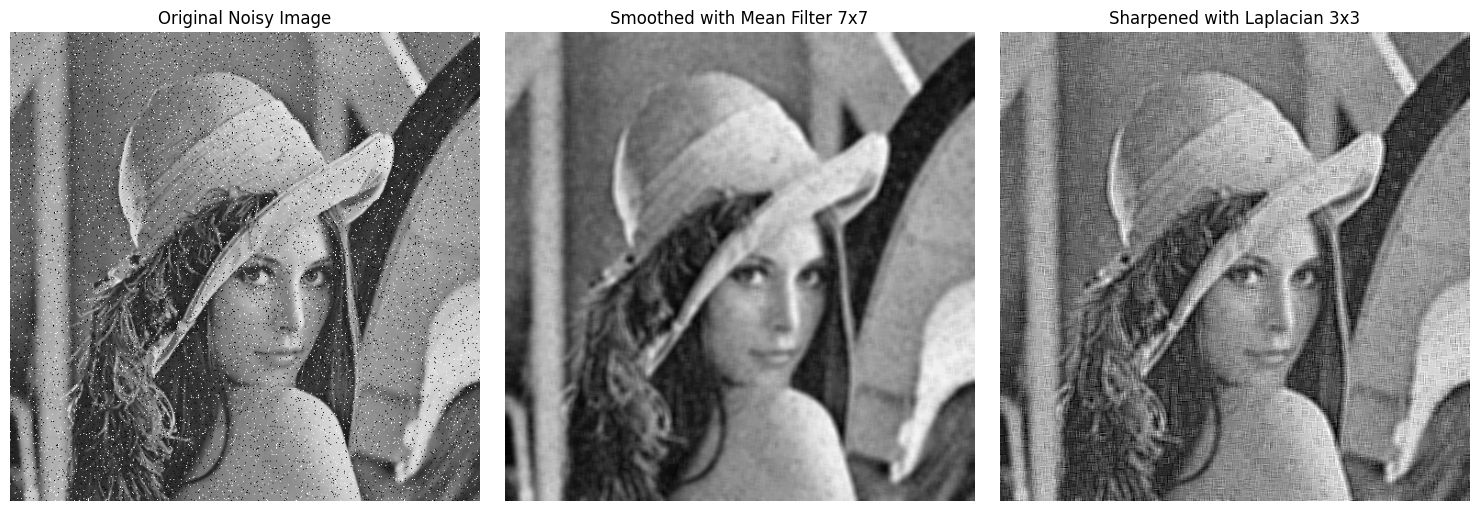

In [43]:
sharpened_7x7_path = realca_laplaciano_3x3(filtered_7x7_path)
sharpened_7x7_arr = np.asarray(Image.open(sharpened_7x7_path), dtype=np.uint8)

# Display images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(original_arr, cmap='gray')
axes[0].set_title('Original Noisy Image')
axes[0].axis('off')

axes[1].imshow(filtered_7x7_arr, cmap='gray')
axes[1].set_title('Smoothed with Mean Filter 7x7')
axes[1].axis('off')

axes[2].imshow(sharpened_7x7_arr, cmap='gray')
axes[2].set_title('Sharpened with Laplacian 3x3')
axes[2].axis('off')

plt.tight_layout()
plt.show()